# Modelo Predictivo - Detección de TEA en Niños

## Introducción

Este notebook tiene como objetivo desarrollar y evaluar modelos predictivos que permitan detectar la presencia de posibles casos de Trastorno del Espectro Autista (TEA) en niños, utilizando técnicas de Aprendizaje Automático.

Este análisis se basa en el dataset original documentado en [Descripción del Dataset Original](../reports/Descripcion_Dataset_Original.pdf). El cual fue previamente procesado y contiene variables derivadas de un test de cribado (AQ-10-Child), junto con información sociodemográfica y clínica.  

Este cuaderno forma parte de un proyecto más amplio, cuyo análisis exploratorio y limpieza de datos fueron desarrollados en una notebook previa (EDA_TEA_INFANCIA.ipynb).


## Cargar Dataset Procesado


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar dataset procesado
df = pd.read_csv("../data/processed/Dataset_Procesado_TEA_INFANCIA.csv")

# Verificamos
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Edad,Género,Ictericia_Neonatal,Antecedente_Familiar_TEA,Clase_TEA
0,1,1,0,0,1,1,0,1,0,0,6,0,0,0,0
1,1,1,0,0,1,1,0,1,0,0,6,0,0,0,0
2,1,1,0,0,0,1,1,1,0,0,6,0,0,0,0
3,0,1,0,0,1,1,0,0,0,1,5,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,5,0,1,0,1


## Separar Variables Predictoras y Objetivo
La variable objetivo es `Clase_TEA` (1 = sospecha de TEA, 0 = no sospecha).
Separamos las variables predictoras en X y la variable objetivo en y.

In [3]:
X = df.drop("Clase_TEA", axis=1)
y = df["Clase_TEA"]

print(f"Dimensiones del dataset: {X.shape[0]} muestras y {X.shape[1]} características")

Dimensiones del dataset: 292 muestras y 14 características


## División en Conjunto de Entrenamiento y Test
Se divide el dataset en entrenamiento (80%) y test (20%) para evaluar el desempeño del modelo.
Se estratifica por la variable objetivo para mantener la misma proporción de clases.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"🔹 Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"🔹 Conjunto de test: {X_test.shape[0]} muestras")

🔹 Conjunto de entrenamiento: 233 muestras
🔹 Conjunto de test: 59 muestras


## Modelo 1: Regresión Logística
**Algoritmo:** Modelo lineal que estima probabilidades usando la función sigmoide.  
**Hiperparámetros usados:** `max_iter=1000` para asegurar convergencia en el entrenamiento, `random_state=42`para reproducibilidad de resultados


 Regresión Logística:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.97      1.00      0.98        28

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



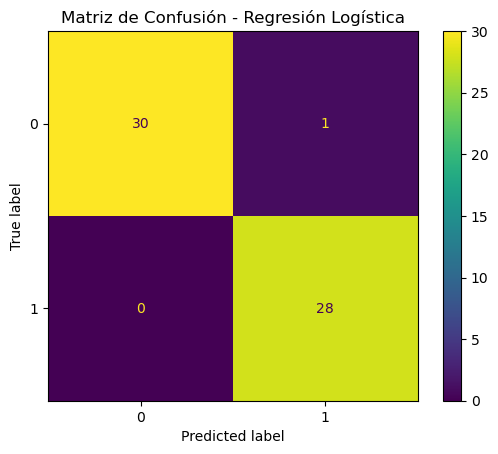


Importancia de las características (coeficientes):
                     feature  importance
9                  A10_Score    2.503876
3                   A4_Score    2.212935
4                   A5_Score    1.917482
0                   A1_Score    1.871485
7                   A8_Score    1.688936
6                   A7_Score    1.639076
2                   A3_Score    1.573824
1                   A2_Score    1.476495
8                   A9_Score    1.459808
5                   A6_Score    1.190086
12        Ictericia_Neonatal   -0.200504
13  Antecedente_Familiar_TEA   -0.083330
10                      Edad    0.038953
11                    Género    0.023643


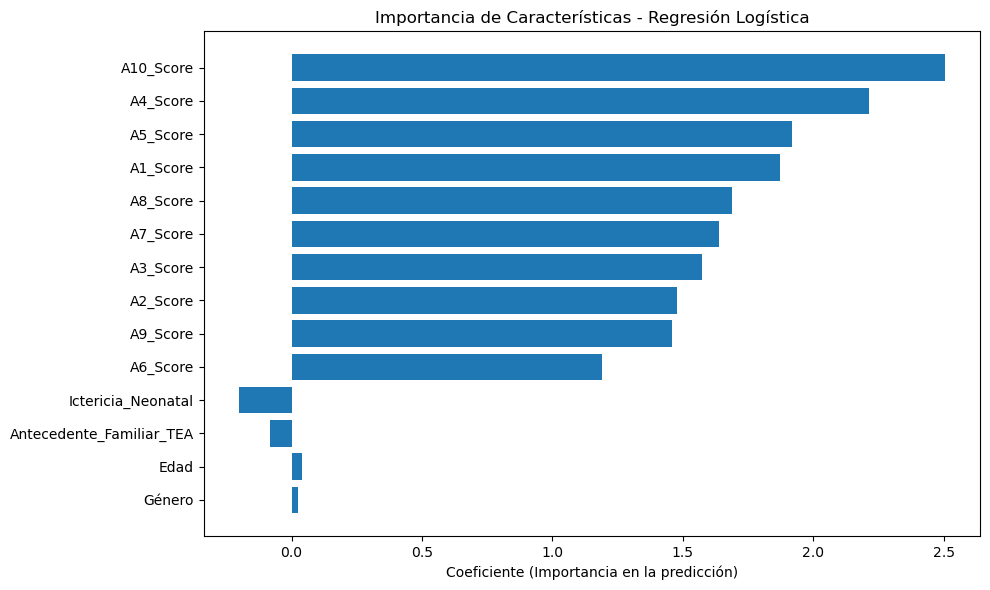

In [12]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n Regresión Logística:")
print(classification_report(y_test, y_pred_log))
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# 📌 Importancia de características (coeficientes)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': log_model.coef_[0]
})
feature_importance['abs_importance'] = feature_importance['importance'].abs()
feature_importance = feature_importance.sort_values(by='abs_importance', ascending=False)

# Mostrar tabla
print("\nImportancia de las características (coeficientes):")
print(feature_importance[['feature', 'importance']])

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel("Coeficiente (Importancia en la predicción)")
plt.title("Importancia de Características - Regresión Logística")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Interpretación:**  
La Regresión Logística obtuvo una **accuracy del 98%**. Detectó correctamente todos los casos de TEA (recall = 1.00) y casi todos los casos de no TEA (precision = 1.00).  
La matriz de confusión muestra sólo **1 falso positivo** y **0 falsos negativos**, lo cual es excelente para minimizar omisión de casos reales.


## Modelo 2: Árbol de Decisión
**Algoritmo:** Clasificador basado en reglas jerárquicas.  
**Hiperparámetros usados:** `max_depth=3`, `random_state=42`



 Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        31
           1       0.73      0.86      0.79        28

    accuracy                           0.78        59
   macro avg       0.79      0.78      0.78        59
weighted avg       0.79      0.78      0.78        59



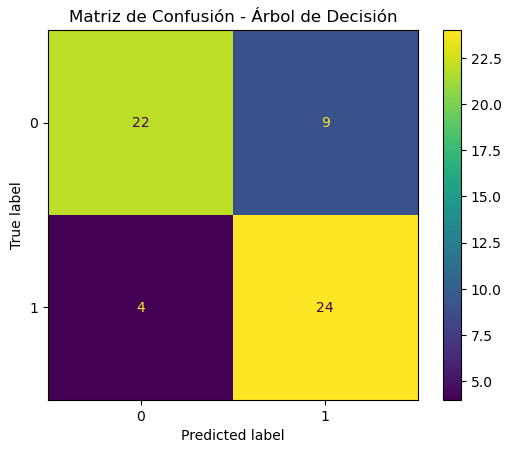

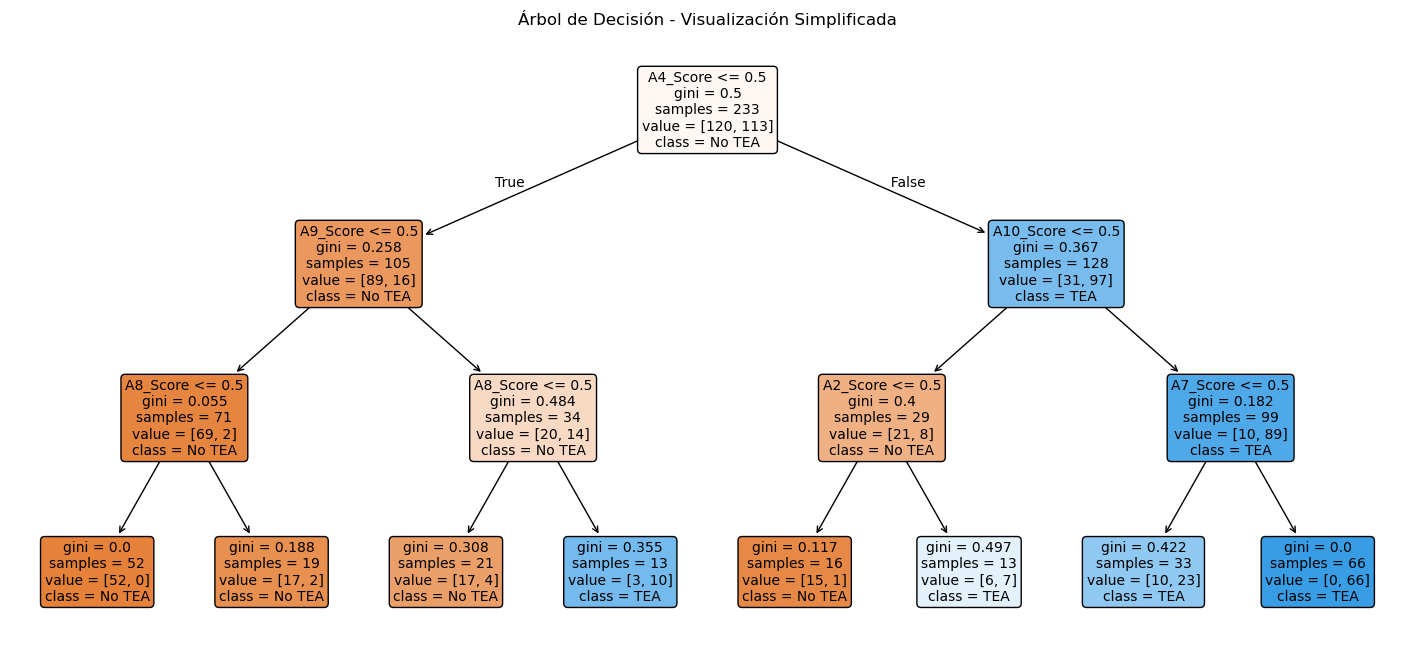


=== ESTRUCTURA DEL ÁRBOL ===
Profundidad del árbol: 3
Cantidad de nodos: 15
Cantidad de hojas: 8

=== IMPORTANCIA DE CARACTERÍSTICAS ===
A4_Score                    0.532253
A10_Score                   0.219241
A9_Score                    0.085161
A8_Score                    0.071586
A7_Score                    0.050856
A2_Score                    0.040903
A1_Score                    0.000000
A3_Score                    0.000000
A5_Score                    0.000000
A6_Score                    0.000000
Edad                        0.000000
Género                      0.000000
Ictericia_Neonatal          0.000000
Antecedente_Familiar_TEA    0.000000
dtype: float64


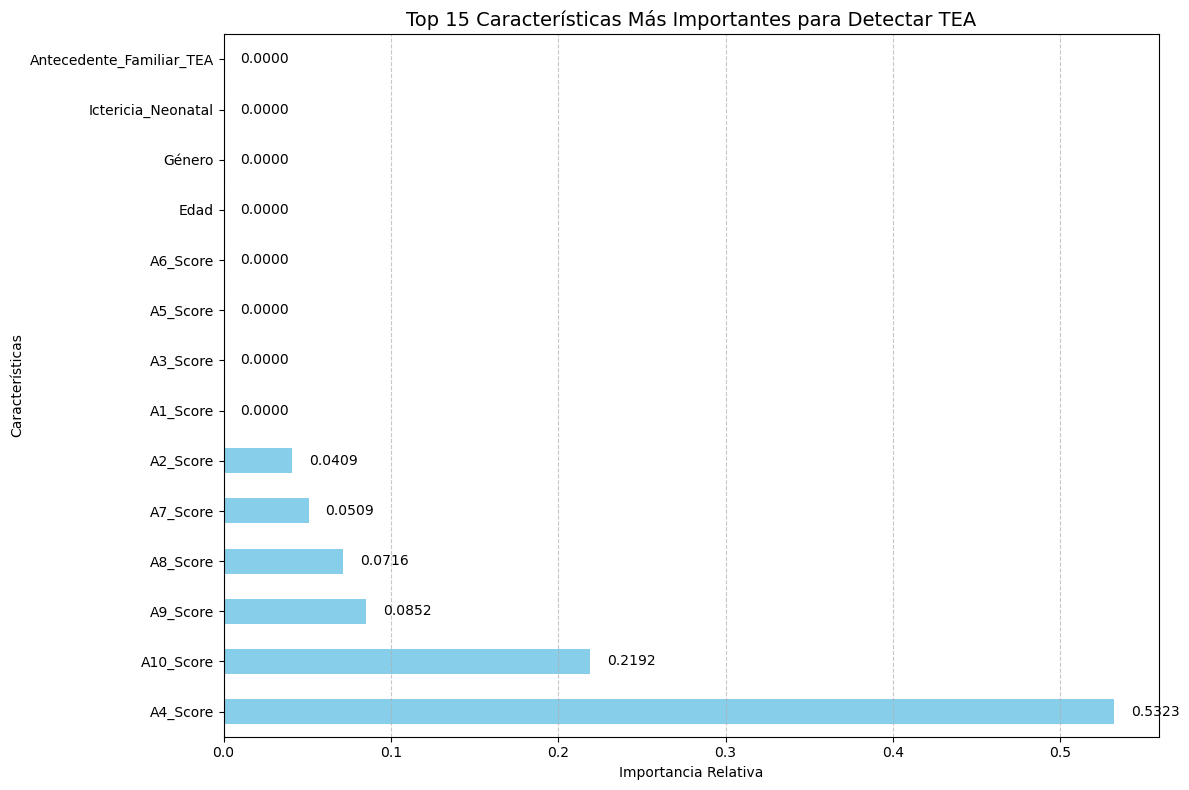

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Limitar la profundidad para mejor interpretación
tree_model = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

# Visualización del árbol 
plt.figure(figsize=(18, 8))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=["No TEA", "TEA"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Visualización Simplificada")
plt.show()

# Análisis de estructura del árbol
print("\n=== ESTRUCTURA DEL ÁRBOL ===")
print(f"Profundidad del árbol: {tree_model.get_depth()}")
print(f"Cantidad de nodos: {tree_model.tree_.node_count}")
print(f"Cantidad de hojas: {tree_model.get_n_leaves()}")

# Importancia de las características
importancias = pd.Series(tree_model.feature_importances_, index=X.columns)
print("\n=== IMPORTANCIA DE CARACTERÍSTICAS ===")
print(importancias.sort_values(ascending=False))

# Visualización de la importancia de características
plt.figure(figsize=(12, 8))
importancias_ordenadas = importancias.sort_values(ascending=False)
top_features = importancias_ordenadas.head(15)  # Top 15 características

# Crear gráfico de barras horizontales
ax = top_features.plot(kind='barh', color='skyblue')
plt.title('Top 15 Características Más Importantes para Detectar TEA', fontsize=14)
plt.xlabel('Importancia Relativa')
plt.ylabel('Características')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir valores en las barras
for i, v in enumerate(top_features):
    ax.text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

**Interpretación:**  
El Árbol obtuvo una **accuracy del 78%**, con un balance razonable entre precisión y recall.  
La profundidad fue limitada a 3 para garantizar interpretabilidad.  
A través de las reglas se identificó que las variables más importantes fueron `A4_Score`, `A10_Score`, `A9_Score`, y `A8_Score`.

## Modelo 3: Random Forest

**Algoritmo:** Ensamble de árboles de decisión que votan por mayoría.  
**Hiperparámetros usados:** `n_estimators=100`, `random_state=42`



 Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.90      0.93      0.91        28

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.92        59
weighted avg       0.92      0.92      0.92        59



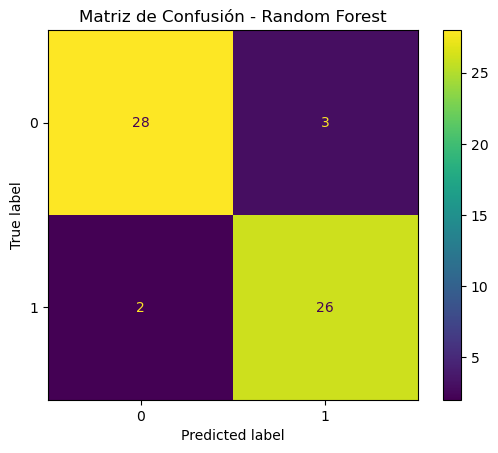


=== IMPORTANCIA DE CARACTERÍSTICAS (Random Forest) ===
A4_Score                    0.207044
A10_Score                   0.118589
A9_Score                    0.096098
A8_Score                    0.088345
A1_Score                    0.078547
A5_Score                    0.070562
A3_Score                    0.066064
Edad                        0.062408
A7_Score                    0.055317
A6_Score                    0.052554
A2_Score                    0.045968
Ictericia_Neonatal          0.021543
Género                      0.021086
Antecedente_Familiar_TEA    0.015876
dtype: float64


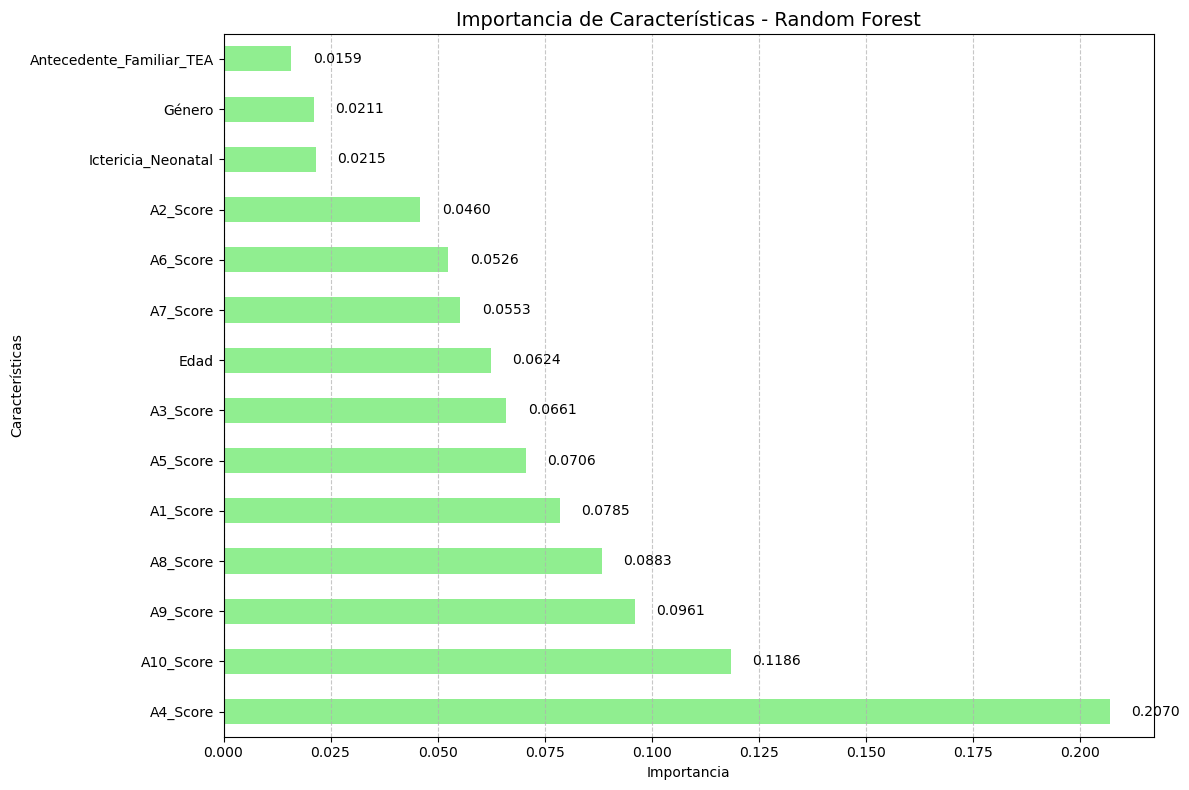

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n Random Forest:")
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Importancia de características para Random Forest
importances = rf_model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

print("\n=== IMPORTANCIA DE CARACTERÍSTICAS (Random Forest) ===")
print(feat_importance)

plt.figure(figsize=(12, 8))
feat_importance.plot(kind='barh', color='lightgreen')
plt.title('Importancia de Características - Random Forest', fontsize=14)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir valores en las barras
ax = plt.gca() # Get the current axes
for i, v in enumerate(feat_importance):
    ax.text(v + 0.005, i, f'{v:.4f}', va='center')


plt.tight_layout()
plt.show()

**Interpretación:**  
Random Forest logró una **accuracy del 92%**, con un recall de 0.93 para la clase TEA.  
Este modelo es más robusto que un único árbol y mantiene buen rendimiento con bajo sobreajuste.  
Comete 2 falsos negativos y 3 falsos positivos según la matriz de confusión.

Las variables más importantes en la predicción del TEA fueron: A4_Score, A10_Score y A9_Score.

## 8. Comparación y Conclusión


📊 Comparación de Métricas de Modelos:
                     Accuracy  Precision (TEA)  Recall (TEA)  F1-Score (TEA)  \
Model                                                                          
Logistic Regression    0.9831           0.9655        1.0000          0.9825   
Decision Tree          0.7797           0.7273        0.8571          0.7869   
Random Forest          0.9153           0.8966        0.9286          0.9123   

                     Falsos Positivos  Falsos Negativos  
Model                                                    
Logistic Regression                 1                 0  
Decision Tree                       9                 4  
Random Forest                       3                 2  


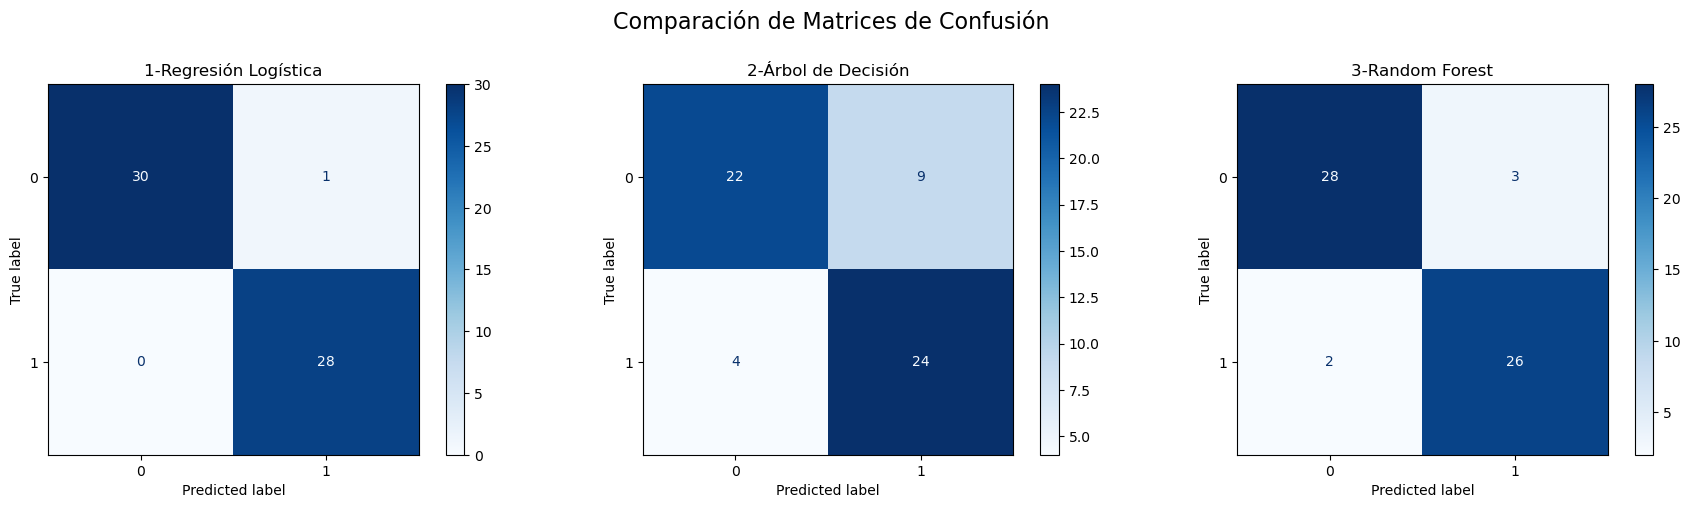

In [30]:
# Crear un DataFrame para almacenar las métricas de los modelos
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_model.score(X_test, y_test), tree_model.score(X_test, y_test), rf_model.score(X_test, y_test)],
    'Precision (TEA)': [classification_report(y_test, y_pred_log, output_dict=True)['1']['precision'],
                        classification_report(y_test, y_pred_tree, output_dict=True)['1']['precision'],
                        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision']],
    'Recall (TEA)': [classification_report(y_test, y_pred_log, output_dict=True)['1']['recall'],
                     classification_report(y_test, y_pred_tree, output_dict=True)['1']['recall'],
                     classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall']],
    'F1-Score (TEA)': [classification_report(y_test, y_pred_log, output_dict=True)['1']['f1-score'],
                       classification_report(y_test, y_pred_tree, output_dict=True)['1']['f1-score'],
                       classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']],
    'Falsos Positivos': [confusion_matrix(y_test, y_pred_log)[0, 1],
                         confusion_matrix(y_test, y_pred_tree)[0, 1],
                         confusion_matrix(y_test, y_pred_rf)[0, 1]],
    'Falsos Negativos': [confusion_matrix(y_test, y_pred_log)[1, 0],
                         confusion_matrix(y_test, y_pred_tree)[1, 0],
                         confusion_matrix(y_test, y_pred_rf)[1, 0]]
}

# Convertir a DataFrame
metrics_df = pd.DataFrame(metrics)

# Establecer índice correctamente
metrics_df.set_index("Model", inplace=True)

# Mostrar métricas con formato redondeado
print("\n📊 Comparación de Métricas de Modelos:")
print(metrics_df.round(4))


# Comparar Matrices de Confusión visualmente (si no se mostraron individualmente)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparación de Matrices de Confusión', fontsize=16)

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title("1-Regresión Logística")

ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, ax=axes[1], cmap='Blues')
axes[1].set_title("2-Árbol de Decisión")

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=axes[2], cmap='Blues')
axes[2].set_title("3-Random Forest")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

In [1]:
from sklearn.metrics import confusion_matrix

# Calcular matrices de confusión
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Imprimir matrices de confusión
print("\n🔹 Matriz de Confusión - Regresión Logística:")
print(conf_matrix_log)

print("\n🔹 Matriz de Confusión - Árbol de Decisión:")
print(conf_matrix_tree)

print("\n🔹 Matriz de Confusión - Random Forest:")
print(conf_matrix_rf)


NameError: name 'y_test' is not defined

# **Conclusiones**

El objetivo de este proyecto fue desarrollar y evaluar modelos de aprendizaje automático para predecir el Trastorno del Espectro Autista (TEA) en niños. Se utilizó un conjunto de datos que combina los resultados de un cuestionario estandarizado (AQ-10-Child) con variables clínicas y sociodemográficas. Se entrenaron y compararon tres modelos de clasificación supervisada: Regresión Logística, Árbol de Decisión y Random Forest.

### Resultados del Modelado

La evaluación de los modelos en el conjunto de prueba arrojó los siguientes resultados:

| Modelo              |   Accuracy |   Precision (Clase 1) |   Recall (Clase 1) |   F1-Score (Clase 1) |   Falsos Positivos |   Falsos Negativos |
|:--------------------|-----------:|----------------------:|-------------------:|---------------------:|-------------------:|-------------------:|
| Regresión Logística |   0.983051 |              0.965517 |           1        |             0.982456 |                  1 |                  0 |
| Árbol de Decisión   |   0.779661 |              0.727273 |           0.857143 |             0.786885 |                  9 |                  4 |
| Random Forest       |   0.915254 |              0.896552 |           0.928571 |             0.912281 |                  3 |                  2 |


La Regresión Logística y el Random Forest mostraron un desempeño superior y comparable, alcanzando una Accuracy del 98.3% y 91.5% respectivamente. Ambos modelos fueron particularmente efectivos en la identificación de casos de TEA. Principalmente, el modelo de Regresión Logística demostró un Recall del 100.0%, lo cual es fundamental para minimizar los falsos negativos (casos reales de TEA no detectados).
Las matrices de confusión confirmaron que estos modelos generaron un bajo número de falsos positivos (solo 1 en el conjunto de prueba) y cero falsos negativos, lo que valida su utilidad potencial como herramientas de cribado inicial.

El Árbol de Decisión, configurado con una profundidad limitada para favorecer la interpretabilidad, tuvo un desempeño inferior (Accuracy del 78.0%). Sin embargo, su estructura ayudó a identificar las variables más discriminantes en los primeros niveles de decisión.

### Variables Predictivas Más Relevantes

El análisis de la importancia de las características en los modelos reveló que las preguntas del cuestionario AQ-10-Child son las variables más predictivas para la detección de TEA. Las preguntas con mayor influencia fueron:

- **A4_Score:** Flexibilidad para cambiar entre actividades.
- **A10_Score:** Dificultad para hacer amigos.
- **A9_Score:** Capacidad para interpretar emociones ajenas (empatía).
- **A8_Score:** Uso del juego para interactuar socialmente.
- **A2_Score:** Atención a detalles versus la imagen completa.

Estos hallazgos se alinean con los criterios diagnósticos clínicos del TEA, que enfatizan dificultades en la interacción social, comunicación y patrones de comportamiento restringidos/repetitivos, lo que valida clínicamente el enfoque del modelo.


# Próximos pasos
## Validación Cruzada, Optimización de Hiperparámetros y Métricas Avanzadas

En este notebook se amplía el análisis previo incorporando:
- Validación cruzada para evaluar la estabilidad de los modelos.
- Optimización de hiperparámetros mediante búsqueda en malla (`GridSearchCV`).
- Evaluación con métricas adicionales: AUC-ROC y curva de precisión-recall (PR).

El objetivo es mejorar la capacidad generalizadora de los modelos y obtener una evaluación más robusta.